### This below cells contains all the descriptive analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Customer Satisfaction.csv')

In [162]:
df.head()

,id,Gender,Age,Travel Category,Travel Class,Distance Travelled,Departure/Arrival Rating,Booking Ease,Boarding Point,Food,Seat Comfort,Entertainment,Leg Room,Luggage Handling,Cleanliness,Departure Delay (min),Arrival Delay (min),Satisfaction
0,70172,Male,13,Personal Travel,Premium,414,4.0,3.0,1.0,5.0,5.0,5.0,NaN,4.0,5,25,18.0,dissatisfied
1,5047,Male,25,Official,Business,212,2.0,3.0,3.0,1.0,NaN,1.0,5.0,3.0,1,1,6.0,dissatisfied
2,110028,Female,26,Official,Business,1028,2.0,2.0,2.0,5.0,5.0,5.0,3.0,4.0,5,0,0.0,satisfied
3,24026,Female,25,Official,Business,506,5.0,5.0,5.0,NaN,2.0,2.0,5.0,3.0,2,11,9.0,dissatisfied
4,119299,Male,61,Official,Business,193,3.0,3.0,3.0,NaN,5.0,3.0,4.0,4.0,3,0,0.0,satisfied


In [164]:
# 1. Gender Distribution
print("1. Gender Distribution")

# Proportion of male to female travelers
gender_counts = df['Gender'].value_counts()
proportion = gender_counts / len(df)
print("Proportion of male to female travelers:")
print(proportion)


1. Gender Distribution
Proportion of male to female travelers:
Gender
Female    0.507459
Male      0.492541
Name: count, dtype: float64


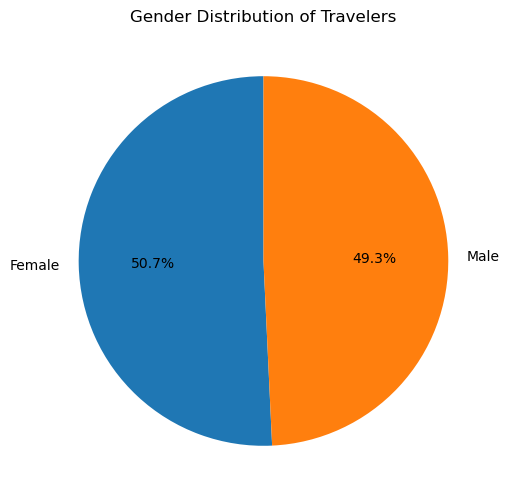

In [166]:
# Plotting the gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Travelers')
plt.ylabel('')
plt.show()

In [17]:
# How does gender relate to satisfaction levels?
gender_satisfaction = df.groupby(['Gender', 'Satisfaction']).size().unstack(fill_value=0)
print("\nGender vs. Satisfaction Levels:")
print(gender_satisfaction)


Gender vs. Satisfaction Levels:
Satisfaction  dissatisfied  satisfied
Gender                               
Female               30193      22534
Male                 28686      22491


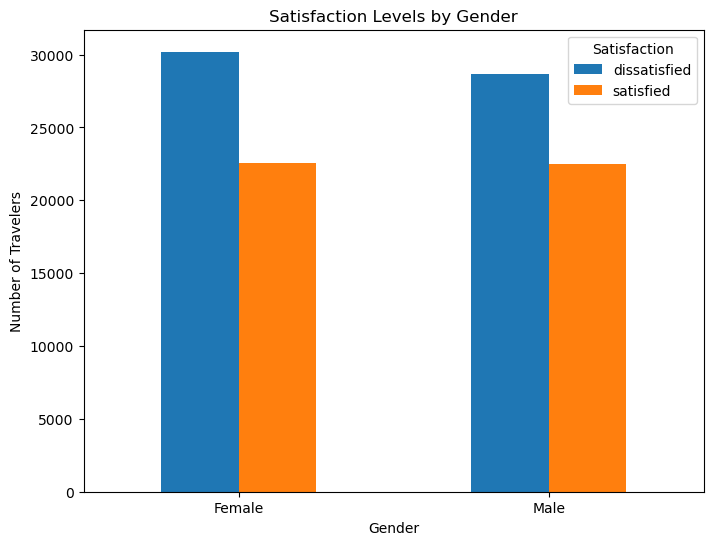

In [19]:
# Plotting gender vs. satisfaction
gender_satisfaction.plot(kind='bar', figsize=(8, 6))
plt.title('Satisfaction Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Travelers')
plt.xticks(rotation=0)
plt.show()

In [170]:
# 2. Age Analysis
print("\n2. Age Analysis")

# Average age of travelers
average_age = df['Age'].mean()
print(f"Average age of travelers: {average_age:.2f}")

# Age range and brackets
age_bins = [18, 30, 45, 60, df['Age'].max()]
age_labels = ['18-30', '31-45', '46-60', '61+']
df['AgeBracket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_bracket_counts = df['AgeBracket'].value_counts().sort_index()
print("\nTravelers in age brackets:")
print(age_bracket_counts)



2. Age Analysis
Average age of travelers: 39.38

Travelers in age brackets:
AgeBracket
18-30    22796
31-45    32943
46-60    30515
61+       9702
Name: count, dtype: int64


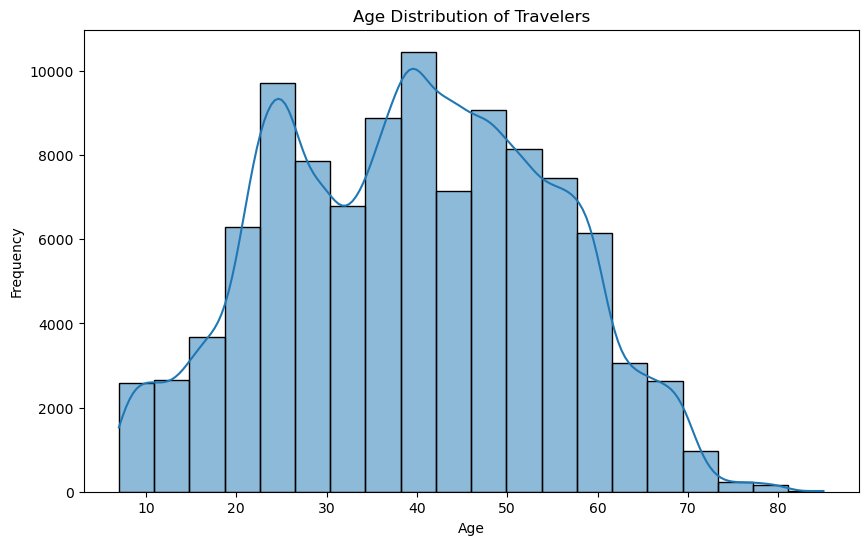

In [27]:
# Plotting age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Travelers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [29]:
# 3. Travel Category
print("\n3. Travel Category")

# Travelers by travel category
travel_category_counts = df['Travel Category'].value_counts()
print("Travelers by travel category:")
print(travel_category_counts)



3. Travel Category
Travelers by travel category:
Travel Category
Official           71655
Personal Travel    32249
Name: count, dtype: int64


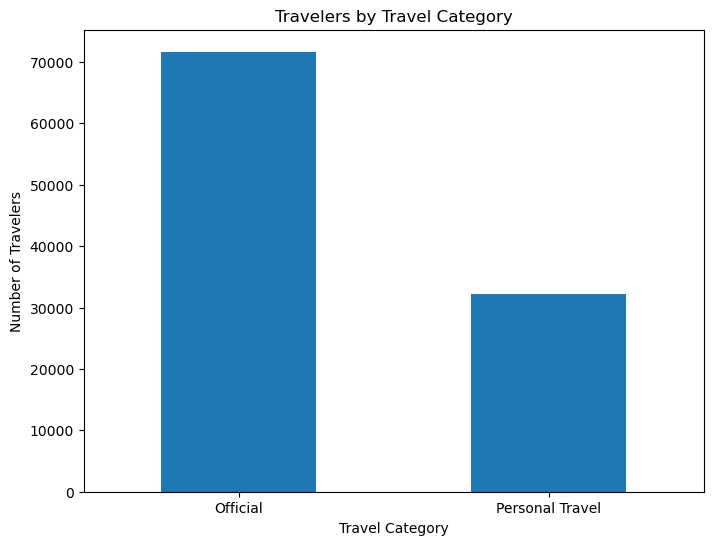

In [33]:
# Plotting travel category
travel_category_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Travelers by Travel Category')
plt.xlabel('Travel Category')
plt.ylabel('Number of Travelers')
plt.xticks(rotation=0)
plt.show()

In [35]:
# Average distance by travel category
avg_distance_by_category = df.groupby('Travel Category')['Distance Travelled'].mean()
print("\nAverage distance traveled by each travel category:")
print(avg_distance_by_category)


Average distance traveled by each travel category:
Travel Category
Official           1093.241867
Personal Travel     633.655834
Name: Distance Travelled, dtype: float64


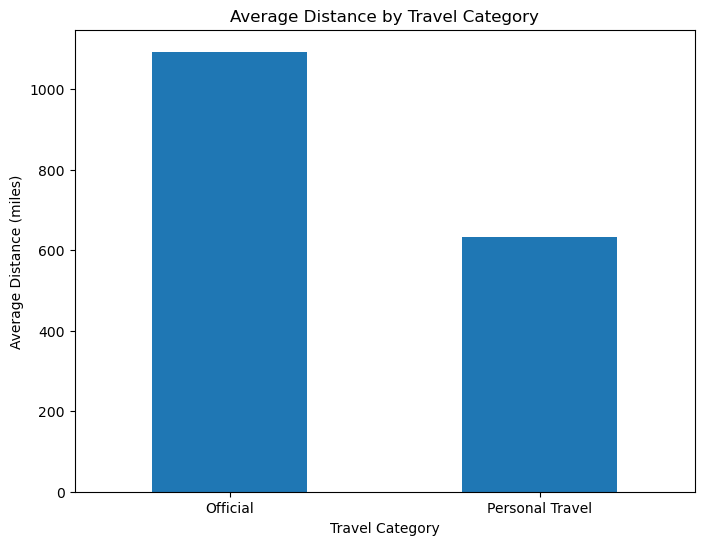

In [37]:
# Plotting average distance by travel category
avg_distance_by_category.plot(kind='bar', figsize=(8, 6))
plt.title('Average Distance by Travel Category')
plt.xlabel('Travel Category')
plt.ylabel('Average Distance (miles)')
plt.xticks(rotation=0)
plt.show()

In [39]:
# 4. Travel Class Ratings
print("\n4. Travel Class Ratings")

# Average rating for seat comfort across different travel classes
avg_seat_comfort_by_class = df.groupby('Travel Class')['Seat Comfort'].mean()
print("Average rating for seat comfort across different travel classes:")
print(avg_seat_comfort_by_class)



4. Travel Class Ratings
Average rating for seat comfort across different travel classes:
Travel Class
Business    3.764678
Economy     3.136548
Premium     3.180770
Name: Seat Comfort, dtype: float64


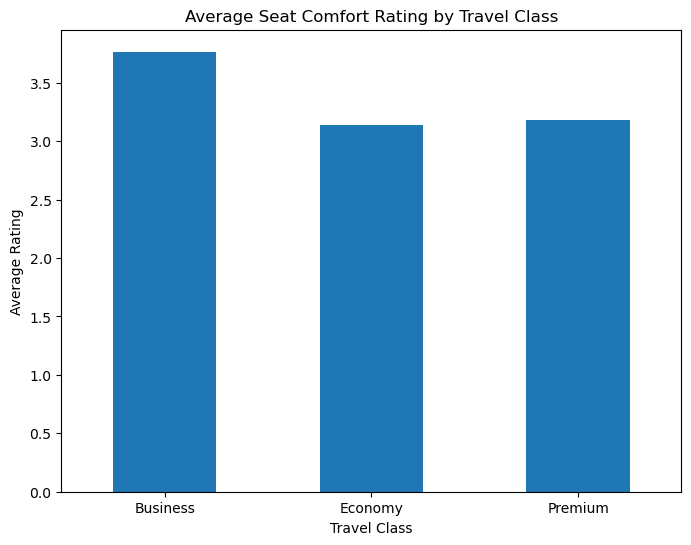

In [41]:
# Plotting average seat comfort by class
avg_seat_comfort_by_class.plot(kind='bar', figsize=(8, 6))
plt.title('Average Seat Comfort Rating by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [47]:
# How does the rating for food differ between "Business" and "Eco" classes?
food_rating_comparison = df[df['Travel Class'].isin(['Business', 'Economy'])]
avg_food_rating_comparison = food_rating_comparison.groupby('Travel Class')['Food'].mean()
print("\nAverage food rating for Business vs. Premium classes:")
print(avg_food_rating_comparison)


Average food rating for Business vs. Premium classes:
Travel Class
Business    3.323518
Economy     3.086935
Name: Food, dtype: float64


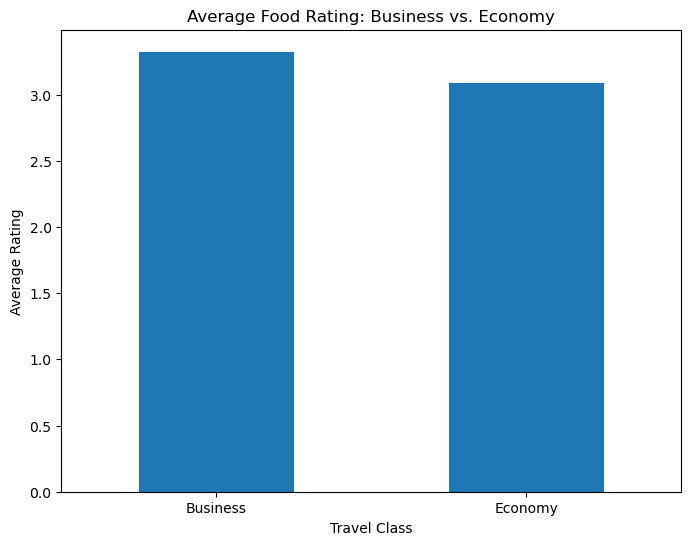

In [49]:
# Plotting food rating comparison
avg_food_rating_comparison.plot(kind='bar', figsize=(8, 6))
plt.title('Average Food Rating: Business vs. Economy')
plt.xlabel('Travel Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [51]:
# 5. Delay Analysis
print("\n5. Delay Analysis")

# Average departure and arrival delay
avg_departure_delay = df['Departure Delay (min)'].mean()
avg_arrival_delay = df['Arrival Delay (min)'].mean()
print(f"Average departure delay: {avg_departure_delay:.2f} minutes")
print(f"Average arrival delay: {avg_arrival_delay:.2f} minutes")



5. Delay Analysis
Average departure delay: 14.82 minutes
Average arrival delay: 15.18 minutes


In [53]:
# How do delays impact customer satisfaction?
delay_satisfaction = df.groupby('Satisfaction')[['Departure Delay (min)', 'Arrival Delay (min)']].mean()
print("\nAverage delays by satisfaction level:")
print(delay_satisfaction)



Average delays by satisfaction level:
              Departure Delay (min)  Arrival Delay (min)
Satisfaction                                            
dissatisfied              16.503728            17.127536
satisfied                 12.608084            12.630799


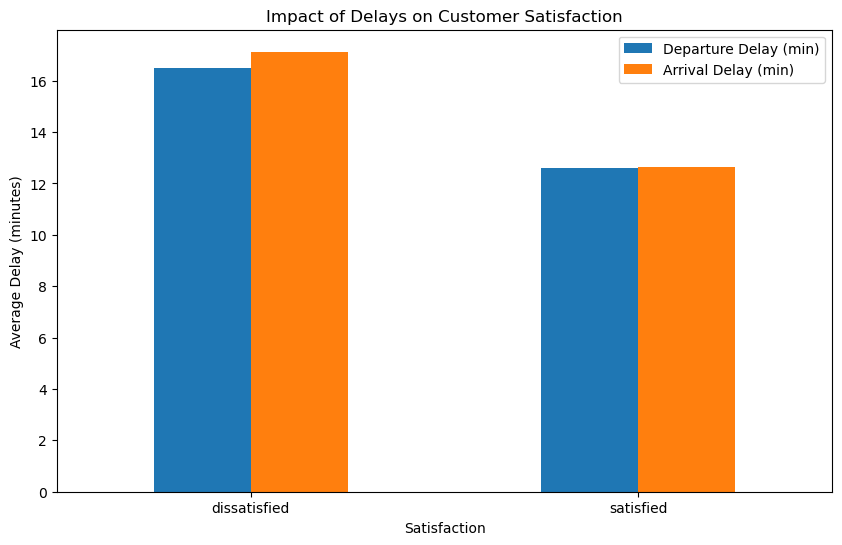

In [55]:
# Plotting delays by satisfaction
delay_satisfaction.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Delays on Customer Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.show()

### Now let's build some models

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# First we have to clean the data. This involves ensuring there are no missing values and all the outliers are removed. 
We achieve this by replacing the missing values with appropriate values. The missing categorical values are replaced by Mode. This preserves the most common category, maintaining data distribution. The missing numerical values are replaced by Median. This ensures that the values are not influenced by outliers, which is likely to happen when Mean is used to fill the missing values.

In [68]:
# 1. Data Cleaning
# Handle missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Handle non-numeric columns (including categorical) with mode
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode(), inplace=True)


Next is removing outliers. Outliers are data points that fall beyond a certain range. The get the range we first calculate the middle 50% of the data. We get this by removing data in the <25% and >75% range. Now the range is set by increasing the boundary by a certain amount. In this case we chose 1.5 time of the 50% boundary. https://builtin.com/articles/1-5-iqr-rule

In [87]:
# Handle Outliers
print("\n=== OUTLIER REMOVAL ===")
original_size = len(df)
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    data_range = q3 - q1
    lower_bound = q1 - 1.5 * data_range
    upper_bound = q3 + 1.5 * data_range
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = len(outliers) / len(df)
    if outlier_pct < 0.05:  # Only remove if outliers < 5%
            before_size = len(df)
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            removed = before_size - len(df)
            print(f"{col}: Removed {removed} outliers ({outlier_pct:.2%})")
    else:
            print(f"{col}: Kept {len(outliers)} outliers ({outlier_pct:.2%}) - too many to remove")

print(f"Dataset size: {original_size} → {len(df)} ({len(df)/original_size:.1%} retained)")


=== OUTLIER REMOVAL ===
id: Removed 0 outliers (0.00%)
Age: Removed 0 outliers (0.00%)
Distance Travelled: Removed 2222 outliers (2.31%)
Departure/Arrival Rating: Removed 0 outliers (0.00%)
Booking Ease: Removed 0 outliers (0.00%)
Boarding Point: Removed 0 outliers (0.00%)
Food: Removed 0 outliers (0.00%)
Seat Comfort: Kept 10466 outliers (11.15%) - too many to remove
Entertainment: Removed 0 outliers (0.00%)
Leg Room: Removed 0 outliers (0.00%)
Luggage Handling: Kept 6143 outliers (6.55%) - too many to remove
Cleanliness: Removed 0 outliers (0.00%)
Departure Delay (min): Kept 13175 outliers (14.04%) - too many to remove
Arrival Delay (min): Kept 12659 outliers (13.49%) - too many to remove
Dataset size: 96061 → 93839 (97.7% retained)


### Next is data preparation

In [89]:
# Define features (X) and target (y)
print("\n=== DATA PREPARATION ===")

# Define features (X) and target (y)
X = df.drop(["id", "Satisfaction"], axis=1)
y = df["Satisfaction"]

print("Target variable distribution:")
print(y.value_counts())


=== DATA PREPARATION ===
Target variable distribution:
Satisfaction
dissatisfied    56478
satisfied       37361
Name: count, dtype: int64


In [91]:
y = y.map({"satisfied": 1, "dissatisfied": 0, "neutral or dissatisfied": 0})
print("\nAfter binary encoding:")
print(y.value_counts())



After binary encoding:
Satisfaction
0    56478
1    37361
Name: count, dtype: int64


In [93]:
# 3. Feature Engineering
print("\n=== FEATURE ENGINEERING ===")

# Create "Total Delay" feature if delay columns exist
delay_cols = ["Departure Delay (min)", "Arrival Delay (min)"]
if all(col in X.columns for col in delay_cols):
    X["Total_Delay"] = X["Departure Delay (min)"] + X["Arrival Delay (min)"]
    
    # X.drop(delay_cols, axis=1, inplace=True) - This can be done to reduce the simplicity of the data for ML models. Our goal here is to compare the performance of various models.
    # Hence, I am deciding not to drop the individual delay data. 
    
    print("Created Total_Delay feature from departure and arrival delays")
    print("Kept original delay columns for additional model insights")



=== FEATURE ENGINEERING ===
Created Total_Delay feature from departure and arrival delays
Kept original delay columns for additional model insights


In [99]:
rating_cols = [col for col in X.columns if 'Rating' in col or col in ['Booking Ease', 'Food', 'Seat Comfort', 'Entertainment', 
                'Leg Room', 'Luggage Handling', 'Cleanliness']]

if rating_cols:
    #Average rating across all service aspects
    numeric_rating_cols = [col for col in rating_cols if X[col].dtype in ['int64', 'float64']]
    if numeric_rating_cols:
        X['Avg_service_rating'] = X[numeric_rating_cols].mean(axis=1)  #mean is calculated for all the rating scores across various columns 
                                                                        #and considered as the overall satisfaction
        print(f"Created Avg_service_rating from: {numeric_rating_cols}")

print(f"Final feature set: {X.shape[1]} columns")

Created Avg_service_rating from: ['Departure/Arrival Rating', 'Booking Ease', 'Food', 'Seat Comfort', 'Entertainment', 'Leg Room', 'Luggage Handling', 'Cleanliness']
Final feature set: 19 columns


In [172]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")



Categorical features (4): ['Gender', 'Age', 'Travel Category', 'Travel Class']
Numerical features (12): ['Distance Travelled', 'Departure/Arrival Rating', 'Booking Ease', 'Boarding Point', 'Food', 'Seat Comfort', 'Entertainment', 'Leg Room', 'Luggage Handling', 'Cleanliness', 'Departure Delay (min)', 'Arrival Delay (min)']


#### Now that we have selected the features for our ML model, we dig deep. 

##### Next step is to standardize the values of each feature. This helps the models to perform ideally. Large values in features skews the model performance. We standardize both numberical and categorical values individually and appropriately.  

In [176]:
# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop='first')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [182]:
# TEST PREPROCESSING BEFORE CONTINUING
print("\n=== TESTING PREPROCESSING ===")
try:
    # Test on a small sample first
    test_sample = X.head(5)
    test_transformed = preprocessor.fit_transform(test_sample)
    print("✓ Preprocessing test successful!")
    print(f"Original shape: {test_sample.shape}")
    print(f"Transformed shape: {test_transformed.shape}")
except Exception as e:
    print(f"Preprocessing test failed: {e}")
    print("Please check the feature classification above")
    exit()


=== TESTING PREPROCESSING ===
✓ Preprocessing test successful!
Original shape: (5, 17)
Transformed shape: (5, 19)



=== EXPLORATORY DATA ANALYSIS ===


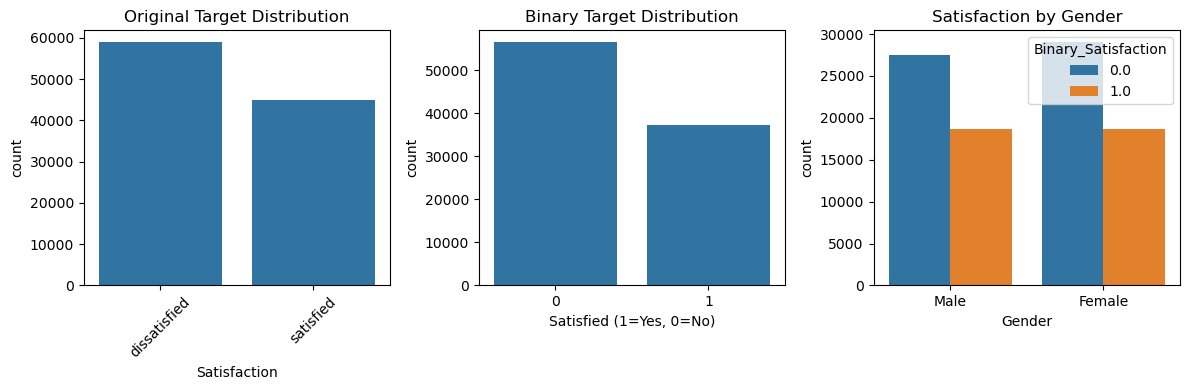

In [180]:
# 4. Exploratory Data Analysis (EDA)
print("\n=== EXPLORATORY DATA ANALYSIS ===")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Satisfaction')
plt.title("Original Target Distribution")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x=y)
plt.title("Binary Target Distribution")
plt.xlabel("Satisfied (1=Yes, 0=No)")

plt.subplot(1, 3, 3)
if 'Gender' in df.columns:
    df_plot = df.copy()
    df_plot['Binary_Satisfaction'] = y
    sns.countplot(data=df_plot, x='Gender', hue='Binary_Satisfaction')
    plt.title("Satisfaction by Gender")

plt.tight_layout()
plt.savefig("eda_overview.png", dpi=300, bbox_inches='tight')
plt.show()

In [154]:
print("\n=== MODEL TRAINING ===")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set class distribution: {y_train.value_counts().to_dict()}")
print(f"Test set class distribution: {y_test.value_counts().to_dict()}")

# Define models with different complexities
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(random_state=42, probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Store results for comparison
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    try:
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"  ✓ Accuracy: {accuracy:.4f}")
        print(f"  ✓ Precision: {precision:.4f}")
        print(f"  ✓ Recall: {recall:.4f}")
        print(f"  ✓ F1-score: {f1:.4f}")
        
    except Exception as e:
        print(f" Error training {name}: {e}")
        results[name] = {
            'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0,
            'predictions': None, 'probabilities': None
        }


=== MODEL TRAINING ===
Training set: 75071 samples
Test set: 18768 samples
Training set class distribution: {0: 45182, 1: 29889}
Test set class distribution: {0: 11296, 1: 7472}

Training Logistic Regression...
  ✓ Accuracy: 0.8217
  ✓ Precision: 0.7897
  ✓ Recall: 0.7527
  ✓ F1-score: 0.7707

Training Decision Tree...
  ✓ Accuracy: 0.8666
  ✓ Precision: 0.8566
  ✓ Recall: 0.7987
  ✓ F1-score: 0.8267

Training Random Forest...
  ✓ Accuracy: 0.8882
  ✓ Precision: 0.8867
  ✓ Recall: 0.8244
  ✓ F1-score: 0.8544

Training KNN...
  ✓ Accuracy: 0.8539
  ✓ Precision: 0.8352
  ✓ Recall: 0.7887
  ✓ F1-score: 0.8113

Training SVM...
  ✓ Accuracy: 0.8813
  ✓ Precision: 0.8680
  ✓ Recall: 0.8279
  ✓ F1-score: 0.8475

Training Gradient Boosting...
  ✓ Accuracy: 0.8733
  ✓ Precision: 0.8582
  ✓ Recall: 0.8166
  ✓ F1-score: 0.8369


In [184]:
# 6. Model Comparison and Visualization
print("\n=== MODEL COMPARISON ===")

# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1']]
print("\nModel Performance Summary:")
print(comparison_df.round(4))


=== MODEL COMPARISON ===

Model Performance Summary:
                     accuracy precision    recall        f1
Logistic Regression  0.821718  0.789666  0.752677  0.770728
Decision Tree        0.866635   0.85661  0.798715   0.82665
Random Forest        0.888161  0.886714  0.824411  0.854428
KNN                    0.8539  0.835176  0.788678  0.811261
SVM                  0.881341  0.867967  0.827891  0.847455
Gradient Boosting    0.873295  0.858228  0.816649  0.836922


In [186]:
# Find best model
best_model = comparison_df['f1'].idxmax()
print(f"\nBest model based on F1-score: {best_model}")


Best model based on F1-score: Random Forest


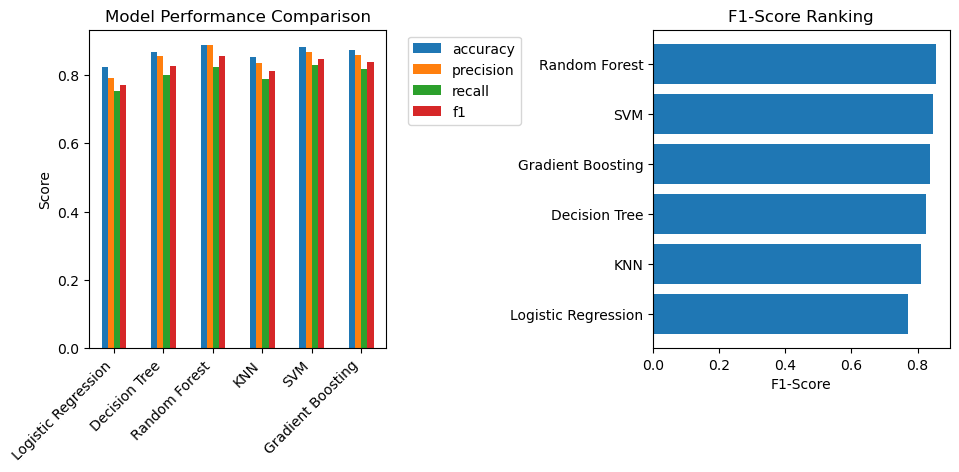

In [204]:
plt.figure(figsize=(16, 12))

# First subplot: Model Performance Comparison
ax1 = plt.subplot(2, 3, 1)
comparison_df.plot(kind='bar', ax=ax1)
ax1.set_title("Model Performance Comparison")
ax1.set_ylabel("Score")
ax1.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Second subplot: F1-Score Ranking
ax2 = plt.subplot(2, 3, 2)
f1_scores = comparison_df['f1'].sort_values(ascending=True)
ax2.barh(f1_scores.index, f1_scores.values)
ax2.set_xlabel("F1-Score")
ax2.set_title("F1-Score Ranking")

# Automatically adjust spacing
plt.tight_layout()

# Expand margins so labels are fully visible
plt.subplots_adjust(
    left=0.06,   # allow room on left
    right=0.95,  # allow room on right 
    bottom=0.15, # allow room at bottom 
    top=0.92,    # a bit of space for titles
    wspace=0.9,  # horizontal space between subplots
    hspace=0.9   # vertical space between subplots
)

plt.show()


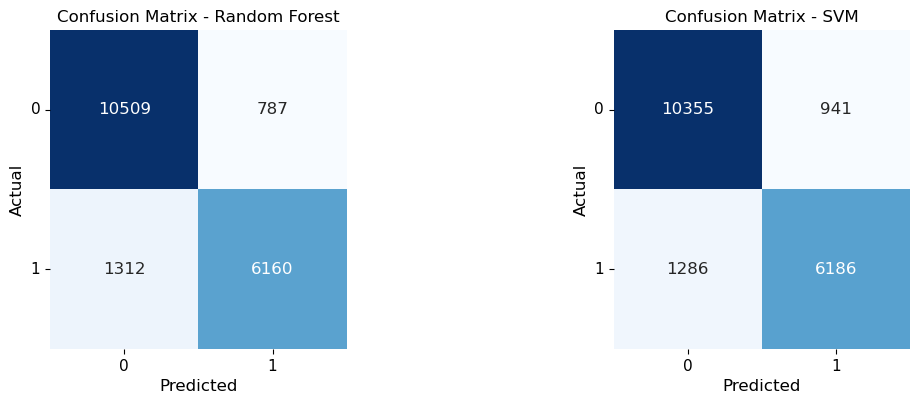

In [234]:
plt.figure(figsize=(16, 12))
# Confusion matrices for top 2 models
top_2_models = comparison_df['f1'].sort_values(ascending=False).index[:2]

for i, model_name in enumerate(top_2_models):
    ax=plt.subplot(2, 3, 4 + i)
    cm = confusion_matrix(y_test, results[model_name]['predictions'])
    sns.heatmap(cm, annot=True, ax=ax, annot_kws={"size": 12}, fmt="d", cmap="Blues", cbar=False)
    ax.set_title(f"Confusion Matrix – {model_name}", fontsize=14)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.subplots_adjust(
    left=0.06,   # allow room on left
    right=0.95,  # allow room on right 
    bottom=0.15, # allow room at bottom 
    top=0.92,    # a bit of space for titles
    wspace=0.9,  # horizontal space between subplots
    hspace=0.9   # vertical space between subplots
)


#### Confusion Matrix explanation for Random forest

True Negatives (10 509): Negative instances correctly identified as negative.

False Positives (787): Negative instances incorrectly labeled positive.

False Negatives (1312): Positive instances incorrectly labeled negative.

True Positives (6160): Positive instances correctly identified as positive.

In [244]:
# 9. Conclusion
print("\n=== CONCLUSION ===")
print(f"Best performing model: {best_model}")
print(f"Best F1-score: {comparison_df.loc[best_model, 'f1']:.4f}")
print("\nModel Rankings by F1-score:")
for i, (model, score) in enumerate(comparison_df['f1'].sort_values(ascending=False).items(), 1):
    print(f"{i}. {model}: {score:.4f}")






=== CONCLUSION ===
Best performing model: Random Forest
Best F1-score: 0.8544

Model Rankings by F1-score:
1. Random Forest: 0.8544
2. SVM: 0.8475
3. Gradient Boosting: 0.8369
4. Decision Tree: 0.8267
5. KNN: 0.8113
6. Logistic Regression: 0.7707


#### Random forest is the best among all the models considering w.r.t F1 score. This can further improved by hyperparameter tuning and combining this with other models to make sure the maximum performance is obtained. 